# 01 데이터 분석

## 1. 데이터 분석

### (1) 데이터 파악

1. 데이터프레임명.head(): 데이터프레임의 처음 몇 개의 행을 반환한다. 데이터의 구조와 내용을 빠르게 파악하기 위해 사용된다.

In [292]:
import pandas as pd

# 예시 데이터
data = {'Name' : ['A', 'B', 'C', 'D', 'E'],
        'Age' : [25, 30, 22, 28, 34],
        'City' : ['Busan', 'Seoul', 'Daegu', 'Jeju', 'Suwon']}

# 데이터프레임 생성
df = pd.DataFrame(data)

# 처음 3개의 행 출력
print(df.head(3))

  Name  Age   City
0    A   25  Busan
1    B   30  Seoul
2    C   22  Daegu


2. 데이터프레임명.info(): 열의 개수, 비결측치인 값의 개수, 데이터 타입 등 데이터프레임의 정보를 나타낸다.

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    5 non-null      object
 1   Age     5 non-null      int64 
 2   City    5 non-null      object
dtypes: int64(1), object(2)
memory usage: 248.0+ bytes


3. 데이터프레임명.describe(): 숫자 데이터를 가지는 열에 대해 평균, 표준편차, 최솟값, 최댓값 등의 통계량을 보여 준다.

In [294]:
print(df.describe())

             Age
count   5.000000
mean   27.800000
std     4.604346
min    22.000000
25%    25.000000
50%    28.000000
75%    30.000000
max    34.000000


### (2) 데이터 전처리

1. 결측치 이상치 처리

In [295]:
import pandas as pd
import numpy as np

# 예시 데이터
data = {'A' : [1, 2, np.nan, 4, 5],
        'B' : [np.nan, 10, 11, 12, np.nan],
        'C' : [20, 21, 22, np.nan, 24]}

# 데이터프레임
df = pd.DataFrame(data)

# 결측치를 평균값으로 대체
df_filled = df.fillna(df.mean())

print("원본 데이터")
print(df)
print("결측치 처리 후 데이터")
print(df_filled)

원본 데이터
     A     B     C
0  1.0   NaN  20.0
1  2.0  10.0  21.0
2  NaN  11.0  22.0
3  4.0  12.0   NaN
4  5.0   NaN  24.0
결측치 처리 후 데이터
     A     B      C
0  1.0  11.0  20.00
1  2.0  10.0  21.00
2  3.0  11.0  22.00
3  4.0  12.0  21.75
4  5.0  11.0  24.00


2. 데이터 변환
    * 최소-최대 정규화  
    * Z-스코어 표준화

### (3) 데이터 분리

1. feature(X)와 target(Y) 분리

In [296]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 붓꽃 데이터 셋 로드
iris = load_iris()
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_target = pd.DataFrame(data=iris.target, columns=['species'])

# 데이터와 레이블 분리
X = iris_data # 특성 데이터
y = iris_target['species'] # 레이블

In [297]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [298]:
iris_target

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


2. 데이터 인코딩
    * 레이블 인코딩
    * 원-핫 인코딩

3. train_test_split

In [299]:
# iris data
X = iris_data # 특성 데이터
y = iris_target['species'] # 레이블

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


### (4) 데이터 분석(Analyzing)

In [300]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 객체 생성
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# 모델 학습
knn_classifier.fit(X_train, y_train)

# 예측
y_pred = knn_classifier.predict(X_test)

### (5) 성능평가 및 시각화

In [301]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_curve, auc

# 예시 데이터
y_true = [1, 0, 1, 1, 0, 1, 0, 1, 1, 0] # 실제값
y_pred = [1, 0, 0, 1, 0, 1, 0, 1, 0, 1] # 예측값
# Accuracy 계산
accuracy = accuracy_score(y_true, y_pred)
# Recall 계산
recall = recall_score(y_true, y_pred)
# F1 스코어 계산
f1 = f1_score(y_true, y_pred)
# ROC 곡선 및 AUC 계산
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# 결과 출력
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)

Accuracy: 0.7
Recall: 0.6666666666666666
F1 Score: 0.7272727272727272
ROC AUC: 0.7083333333333334


In [302]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 예시 데이터
y_true = [3, 5, 7, 9, 11]
y_pred = [2.8, 5.2, 6.8, 9.3, 11.5]

# MAE 계산
mae = mean_absolute_error(y_true, y_pred)
# MSE 계산
mse = mean_squared_error(y_true, y_pred)
# RMSE 계산
rmse = np.sqrt(mse)
# R2 계산
r2 = r2_score(y_true, y_pred)

print("MAE:", mae)
print("MSE", mse)
print("RMSE:", rmse)
print("R2:", r2)

MAE: 0.28000000000000025
MSE 0.09200000000000012
RMSE: 0.3033150177620622
R2: 0.9884999999999999


## 2. 회귀분석

### (1) 회귀(Regression) 분석 예제

#### 데이터 파악

1. 데이터 셋 가져오기

In [303]:
import numpy as np
import pandas as pd
import seaborn as sns

bike = pd.read_csv('hour.csv')

bike.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


2. 컬럼 확인

In [304]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [305]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [306]:
bike.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### 데이터 전처리

1. 불필요한 변수 제거하기

In [307]:
# 기록정보(instant) 인덱스 제거
bike = bike.drop('instant', axis = 1)
bike.head(5)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [308]:
# 날짜 인덱스 제거
bike = bike.drop(['dteday'], axis = 1)
bike.head(5)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [309]:
# 대여횟수 인덱스 제거
bike = bike.drop(['casual', 'registered'], axis = 1)
bike.head(5)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


2. Dummy 변수 도입하기

In [310]:
# 범주형 데이터 목록
category_list = ['season', 'hr', 'weekday', 'weathersit', 'workingday']

# 백업 데이터 생성
bike_dummy = bike.copy()

3. 훈련 데이터와 테스트 데이터로 분할하기

In [311]:
from sklearn.model_selection import train_test_split 

y_target_d = bike_dummy['cnt']
X_features_d = bike_dummy.drop(['cnt'], axis = 1, inplace = False)

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_features_d, y_target_d, test_size=0.3, random_state=1)

#### 모델 학습하기

In [312]:
from sklearn.linear_model import LinearRegression 

lr = LinearRegression()

lr.fit(X_train_d, y_train_d)

pred = lr.predict(X_test_d)

#### 모델 평가하기

In [313]:
from sklearn.metrics import mean_squared_error, r2_score 
mse = mean_squared_error(y_test_d, pred)

# RMSE 방식
rmse = np.sqrt(mse)
print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse, rmse))

# R2의 분산 지표
print('r2_score : {0:.3f}'.format(r2_score(y_test_d, pred)))

MSE : 20863.800 , RMSE : 144.443
r2_score : 0.392


## 3. 분류(Classification)

### (1) 분류모델

- 로지스틱 회귀(Logistic Regression)
- 의사결정나무(Decision Tree)
- 랜덤 포레스트(Random Rorest)
- KNN(K-Nearest Neighbor)
- xgboost(Extreme Gradient Boosting)

### (2) Decision Tree(의사결정나무)

데이터 확인

In [314]:
import pandas as pd

iris = pd.read_csv('iris.csv')
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [315]:
iris.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'], dtype='object')

In [316]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [317]:
iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


데이터 셋 나누기

In [318]:
# X와 Y분할
X = iris.iloc[:, :-1]
Y = iris.iloc[:, -1]

class_name = ['virginica', 'setosa', 'versicolor']

from sklearn.model_selection import train_test_split
# 데이터의 분할
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3,
                                                    random_state=0, stratify=Y)

# Class 별 분리 확인
print(y_train.value_counts()/y_train.shape[0] * 100)

Species
virginica     33.333333
setosa        33.333333
versicolor    33.333333
Name: count, dtype: float64


In [319]:
# 의사 결정 나무 불러오기
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', random_state=1)

# 트리에 넣어 학습
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

모델 평가하기

In [320]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 평가지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')

# 평가지표 출력
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"AUC-ROC Score: {roc_auc:.3f}")

Accuracy: 0.911
Precision: 0.911
Recall: 0.911
F1 Score: 0.911
AUC-ROC Score: 0.933


### (3) 랜덤포레스트

데이터 불러오기

In [321]:
import pandas as pd
iris = pd.read_csv('iris.csv')

iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [322]:
# X와 Y분할
X = iris.iloc[:, :-1]
Y = iris.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3,
                                                    random_state = 0, stratify = Y)

In [323]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 0)

# 랜덤 포레스트 학습
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

결과 확인 및 정확도 측정

In [324]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 모델 예측
y_pred = rf.predict(X_test)

# 평가지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

Accuracy: 0.978
Precision: 0.979
Recall: 0.978
F1 Score: 0.978


하이퍼 파라미터 수정

In [325]:
rf_1 = RandomForestClassifier(n_estimators = 10,        # 10번 추정
                              max_depth = 2,            # 트리 최대 깊이 2
                              random_state = 1)

rf_1.fit(X_train, y_train)

# 예측 결과를 pred_1 변수에 담기
pred_1 = rf_1.predict(X_test)
accuracy = accuracy_score(y_test, pred_1)

accuracy

0.9555555555555556

In [326]:
rf_2 = RandomForestClassifier(n_estimators = 50,        # 500번 추정
                              max_depth = 3,            # 트리 최대 깊이 3
                              random_state = 1)

rf_2.fit(X_train, y_train)

pred_2 = rf_2.predict(X_test)
accuracy = accuracy_score(y_test, pred_2)

accuracy

0.9777777777777777

# 02 예제

## 연습문제 1: 회귀모형

1. 데이터 확인

In [327]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

x_train = pd.read_csv('housing/X_train_Boston.csv')
y_train = pd.read_csv('housing/y_train_Boston.csv')

# 평가용 데이터 로드
x_test = pd.read_csv('housing/X_test_Boston.csv')

In [328]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  LSTAT    404 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 38.0 KB


2. 데이터 모델링

In [329]:
from sklearn.model_selection import train_test_split
# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.2,
                                                    random_state = 42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (323, 12)
X_test shape: (81, 12)
y_train shape: (323, 1)
y_test shape: (81, 1)


In [330]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [331]:
# 학습용 데이터에 대한 예측
y_train_pred = model.predict(X_train)
# 평가용 데이터에 대한 예측
y_test_pred = model.predict(X_test)

In [332]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# MSE, RMSE
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse, rmse))

# 결정계수
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_test_pred)))

MSE : 12.703 , RMSE : 3.564
Variance score : 0.745


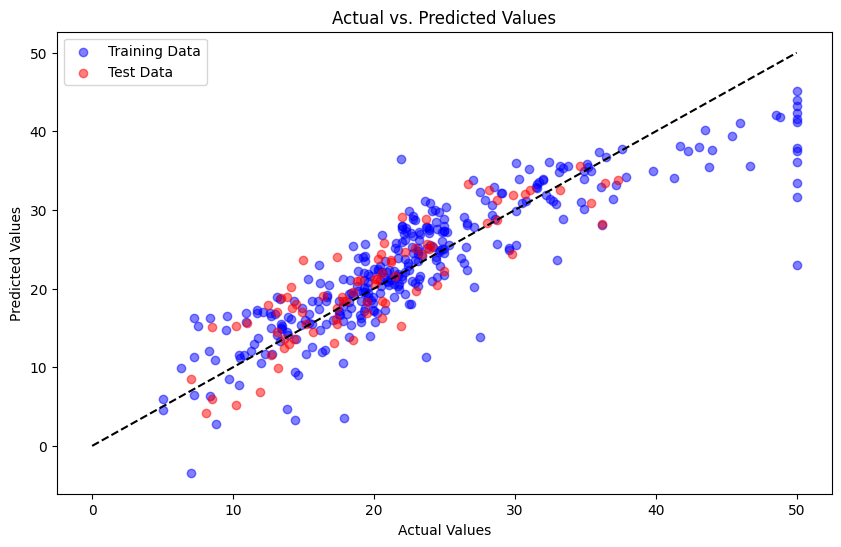

In [333]:
import pandas as pd
import matplotlib.pyplot as plt

# 예측 결과 시각화
plt.figure(figsize = (10, 6))

plt.scatter(y_train, y_train_pred, color = 'blue', alpha = 0.5, label = 'Training Data')
plt.scatter(y_test, y_test_pred, color = 'red', alpha = 0.5, label = 'Test Data')

plt.plot([0, 50], [0, 50], 'k--')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

## 연습문제 2: 분류모형

In [334]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 타이타닉 데이터 셋 로드
x_train = pd.read_csv('titanic/X_train.csv')
y_train = pd.read_csv('titanic/y_train.csv')
x_test = pd.read_csv('titanic/X_test.csv')

In [335]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  712 non-null    int64  
 1   Sex     712 non-null    int64  
 2   Age     712 non-null    float64
 3   SibSp   712 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 22.4 KB


In [336]:
from sklearn.model_selection import train_test_split

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.2,
                                                    random_state = 42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (569, 4)
X_test shape: (143, 4)
y_train shape: (569, 1)
y_test shape: (143, 1)


In [337]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train['Survived'])

RandomForestClassifier()

In [338]:
# 평가용 데이터에 대한 예측
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"정확도: {accuracy:.2f}")

정확도: 0.81


## 연습문제 3: 와인품질 예측

In [340]:
import xgboost as xgb
import pandas as pd

# 학습용 데이터 로드
x_train = pd.read_csv('winequality-red/X_train_winequality.csv')
y_train = pd.read_csv('winequality-red/y_train_winequality.csv')

# 평가용 데이터 로드
x_test = pd.read_csv('winequality-red/X_test_winequality.csv')